Data is obtained from [Annual Social and Economic Supplements (ASEC)](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html)

In [8]:
import pandas
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
import numpy as np

plt.style.use('ggplot')

data = pandas.read_csv('asecpub23csv/asec_csv_repwgt_2023.csv', nrows=100)
data.head(2)

,PPPOS,h_seq,pwwgt0,pwwgt1,pwwgt2,pwwgt3,pwwgt4,pwwgt5,pwwgt6,pwwgt7,pwwgt8,pwwgt9,pwwgt10,pwwgt11,pwwgt12,pwwgt13,pwwgt14,pwwgt15,pwwgt16,pwwgt17,pwwgt18,pwwgt19,pwwgt20,pwwgt21,pwwgt22,pwwgt23,pwwgt24,pwwgt25,pwwgt26,pwwgt27,pwwgt28,pwwgt29,pwwgt30,pwwgt31,pwwgt32,pwwgt33,pwwgt34,pwwgt35,pwwgt36,pwwgt37,pwwgt38,pwwgt39,pwwgt40,pwwgt41,pwwgt42,pwwgt43,pwwgt44,pwwgt45,pwwgt46,pwwgt47,pwwgt48,pwwgt49,pwwgt50,pwwgt51,pwwgt52,pwwgt53,pwwgt54,pwwgt55,pwwgt56,pwwgt57,pwwgt58,pwwgt59,pwwgt60,pwwgt61,pwwgt62,pwwgt63,pwwgt64,pwwgt65,pwwgt66,pwwgt67,pwwgt68,pwwgt69,pwwgt70,pwwgt71,pwwgt72,pwwgt73,pwwgt74,pwwgt75,pwwgt76,pwwgt77,pwwgt78,pwwgt79,pwwgt80,pwwgt81,pwwgt82,pwwgt83,pwwgt84,pwwgt85,pwwgt86,pwwgt87,pwwgt88,pwwgt89,pwwgt90,pwwgt91,pwwgt92,pwwgt93,pwwgt94,pwwgt95,pwwgt96,pwwgt97,pwwgt98,pwwgt99,pwwgt100,pwwgt101,pwwgt102,pwwgt103,pwwgt104,pwwgt105,pwwgt106,pwwgt107,pwwgt108,pwwgt109,pwwgt110,pwwgt111,pwwgt112,pwwgt113,pwwgt114,pwwgt115,pwwgt116,pwwgt117,pwwgt118,pwwgt119,pwwgt120,pwwgt121,pwwgt122,pwwgt123,pwwgt124,pwwgt125,pwwgt126,pwwgt127,pwwgt128,pwwgt129,pwwgt130,pwwgt131,pwwgt132,pwwgt133,pwwgt134,pwwgt135,pwwgt136,pwwgt137,pwwgt138,pwwgt139,pwwgt140,pwwgt141,pwwgt142,pwwgt143,pwwgt144,pwwgt145,pwwgt146,pwwgt147,pwwgt148,pwwgt149,pwwgt150,pwwgt151,pwwgt152,pwwgt153,pwwgt154,pwwgt155,pwwgt156,pwwgt157,pwwgt158,pwwgt159,pwwgt160
0,41,1,1274.991781,618.048421,1614.690383,572.355524,2047.068229,1793.056183,2109.903830,2052.393357,542.365296,711.097079,1868.648981,1868.915501,602.796339,1895.437633,2023.381138,533.908465,638.247447,624.608660,673.301855,2000.441707,693.465624,2092.401114,589.643669,1959.564830,607.238861,573.492616,652.233081,614.148275,1934.754435,1889.281616,709.730086,535.379510,1918.264791,597.668919,722.587057,1864.632029,1951.073879,1732.392562,2091.138280,675.916534,1784.391729,2054.512146,711.710191,1717.362395,622.695823,634.398565,571.518349,716.700713,1982.331604,1883.877166,673.557759,584.686831,2011.426264,624.887228,641.171097,2026.191111,1884.804880,2357.671572,1930.157522,613.842502,1959.495987,601.462180,1808.164773,616.097265,2343.550483,2001.733018,1786.424141,1985.816810,605.399038,607.491346,1975.722444,1695.757251,600.330613,2053.754985,1902.922990,728.848065,674.554734,721.832194,593.043007,2179.387966,692.659922,611.513551,2011.230619,611.193114,2003.369009,2256.371500,1851.219685,1823.372773,658.336950,722.933176,1781.695350,2084.920655,602.317268,2123.397321,2004.240552,576.819424,586.165669,564.873502,733.093022,1916.723393,708.598750,2132.879955,710.258385,1798.958901,609.25170,710.588636,631.360768,566.61952,2353.459985,2026.999162,626.834492,701.401054,1758.138357,649.761065,561.584815,1884.914180,1896.348065,1908.197666,1979.941894,669.738795,1906.213541,2053.333861,653.428084,1692.382840,625.195274,618.839511,589.085281,578.319383,2133.590889,1929.401727,643.298473,635.734870,1790.693870,584.958159,631.028668,1970.444182,2045.342974,1807.062571,1730.247410,675.235212,2027.050169,625.183266,1973.027546,577.090944,2049.381130,1904.425958,1832.664404,1951.001213,603.436935,667.171550,1873.411307,1800.393545,619.770978,1874.83406,1905.551012,604.456880,604.467023,618.359720,677.426254,1868.917121,690.293102
1,41,2,1262.531168,605.245799,1623.834696,598.560172,1954.262964,1744.379780,2477.471364,2146.589435,541.984606,689.322070,1931.660009,1643.107570,613.035478,1829.353696,1952.657582,520.263177,615.885081,662.055847,711.708543,1789.426826,718.684877,1954.537728,608.619192,1965.056948,587.530392,565.140475,628.874488,671.651538,1778.363292,1811.717549,695.161220,543.301657,1771.697532,600.774188,756.648229,2069.870136,2070.957063,1669.761122,1964.960416,809.499969,1665.334014,2210.114096,639.499019,1674.088222,585.322026,603.979454,578.330640,732.444106,1892.603281,1803.989969,628.435103,632.543751,1836.018734,615.782159,651.670161,2013.940576,2088.412223,2104.509336,1990.567635,594.372997,1742.373547,630.000394,1710.851723,674.107292,2144.295125,1842.987921,1879.206569,1890.560589,6

[Note about the weights](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar23.pdf):

"The final weight, which is the product of several
adjustments, is used to produce population estimates
for the various items covered in the regular monthly
CPS. This weight is constructed from the basic weight
for each person, which represents the probability of
selection for the survey. The basic weight is adjusted
for special sampling situations and failure to obtain
interviews from eligible households (noninterview
adjustment). A two-stage ratio estimation procedure
adjusts the sample population to the known distribution
of the entire population."

In [19]:
# 1998 to 2023
# Annual Social and Economic Supplements (ASEC)
# https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html

# House Record, Family Record, Person Record

columns_to_check = ['PTOT_R', 'HEFAMINC', 'HHINC', 'FTOT_R']

In [20]:
data = pandas.read_csv('asecpub23csv/ffpub23.csv', nrows=2)

In [21]:
# FTOT
# Total family income recode

data[[col for col in columns_to_check if col in data.columns]]

,FTOT_R
0,12
1,21


In [22]:
# HEFAMINC
# Family income from basic CPS iincome screener question.
# NOTE: If a nonfamily household, income includes only that of
# householder.

hefaminc = pandas.read_csv('asecpub23csv/hhpub23.csv', nrows=2)
data

,H_IDNUM,GEREG,GESTFIPS,GEDIV,HRHTYPE,HEFAMINC,H_MONTH,H_YEAR,H_TENURE,H_HHNUM,H_LIVQRT,H_RESPNM,H_TELHHD,H_TELAVL,H_TELINT,H1TENURE,H1LIVQRT,H1TELHHD,H1TELAVL,H1TELINT,H_NUMPER,H_HHTYPE,H_TYPEBC,H_MIS,HANNVAL,HANN_YN,HBBSUB_MNTH,HBBSUB_YN,HCHCARE_VAL,HCHCARE_YN,HCOV,HCSPVAL,HCSP_YN,HDISVAL,HDIS_YN,HDIVVAL,HDIV_YN,HDSTVAL,HDST_YN,HEARNVAL,HEDVAL,HED_YN,HENGAST,HENGVAL,HFDVAL,HFINVAL,HFIN_YN,HFLUNCH,HFLUNNO,HFOODMO,HFOODNO,HFOODSP,HFRVAL,HH5TO18,HHINC,HHOTLUN,HHOTNO,HHSTATUS,HH_HI_UNIV,HINC_FR,HINC_SE,HINC_UC,HINC_WC,HINC_WS,HINTVAL,HINT_YN,HLORENT,HMCAID,HNUMFAM,HOIVAL,HOI_YN,HOTHVAL,HPAWVAL,HPAW_YN,HPCTCUT,HPEBT_YN,HPENVAL,HPEN_YN,HPRES_MORT,HPRIV,HPROP_VAL,HPUB,HPUBLIC,HRECORD,HRNTVAL,HRNT_YN,HRNUMWIC,HRWICYN,HSEVAL,HSSIVAL,HSSI_YN,HSSVAL,HSS_YN,HSUP_WGT,HSURVAL,HSUR_YN,HTOP5PCT,HTOTVAL,HUCVAL,HUNDER15,HUNDER18,HUNITS,HVETVAL,HVET_YN,HWCVAL,HWSVAL,H_SEQ,I_CHCAREVAL,I_HBBSUBMNTH,I_HBBSUBYN,I_HENGAS,I_HENGVA,I_HFDVAL,I_HFLUNC,I_HFLUNN,I_HFOODM,I_HFOODN,I_HFOODS,I_HHOTLU,I_HHOTNO,I_HLOREN,I_HPEBTYN,I_HPUBLI,I_HUNITS,I_PROPVAL,NOW_HCOV,NOW_HMCAID,NOW_HPRIV,NOW_HPUB,THCHCARE_VAL,THPROP_VAL,GTCBSA,GTCO,GTCBSAST,GTCBSASZ,GTCSA,GTMETSTA,GTINDVPC,FILEDATE,YYYYMM
0,15771203006254714011,1,23,1,4,8,3,2023,1,1,1,1,1,0,1,0,0,0,0,0,2,1,0,7,0,2,0,2,-1,0,1,0,2,0,2,0,2,0,2,0,0,2,1,2000,2400,0,2,0,0,12,2,1,0,0,12,0,0,1,1,2,2,2,2,2,0,2,0,2,1,0,2,28920,0,2,4,0,0,2,2,3,70000,1,0,1,0,2,0,0,0,0,2,26520,1,158007,2400,1,2,28920,0,0,0,1,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,3,1,0,0,0,0,3,0,0,2,0,72523,202303
1,49338086209001115011,1,23,1,1,9,3,2023,1,1,1,1,1,0,1,0,0,0,0,0,2,1,0,3,0,2,0,2,-1,0,1,0,2,0,2,0,2,0,2,42000,0,2,2,0,0,0,2,0,0,0,0,2,0,0,21,0,0,1,1,2,2,2,2,1,1,1,0,1,1,0,2,8137,0,2,7,0,0,2,2,2,60000,1,0,1,0,2,0,0,0,0,2,8136,1,178960,0,2,2,50137,0,0,0,1,0,2,0,42000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,1,0,0,0,0,3,0,0,2,0,72523,202303


In [ ]:
# HHINC: Total household income

In [23]:
data[[col for col in columns_to_check if col in data.columns]]

,HEFAMINC,HHINC
0,8,12
1,9,21


In [34]:
data = pandas.read_csv('asecpub23csv/pppub23.csv', nrows=1000)
data

,PERIDNUM,PH_SEQ,P_SEQ,A_LINENO,PF_SEQ,PHF_SEQ,OED_TYP1,OED_TYP2,OED_TYP3,PERRP,PXRRP,PXMARITL,PXRACE1,PEHSPNON,PXHSPNON,PEAFEVER,PXAFEVER,PEAFWHN1,PXAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXSPOUSE,PENATVTY,PXNATVTY,PEMNTVTY,PXMNTVTY,PEFNTVTY,PXFNTVTY,PEINUSYR,PXINUSYR,PEPAR1,PXPAR1,PEPAR2,PXPAR2,PEPAR1TYP,PXPAR1TYP,PEPAR2TYP,PXPAR2TYP,PRDASIAN,PRDTHSP,PRDTRACE,PRPERTYP,PRCITFLG,PRCITSHP,PECOHAB,PXCOHAB,PEABSRSN,PEHRUSLT,PEMLR,PRDISC,PRPTREA,PRUNTYPE,PRWKSTAT,PEIO1COW,PRCOW1,PRERELG,PRWERNAL,PRHERNAL,PRNLFSCH,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,PRDISFLG,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,A_AGE,A_SEX,A_DTIND,A_HRSPAY,A_PAYABS,A_WANTJB,A_HRLYWK,A_ENRLW,A_EXPLF,A_MJIND,A_UNMEM,A_MJOCC,A_DTOCC,A_UNCOV,A_HSCOL,A_FTPT,A_WKSCH,A_FNLWGT,A_ERNLWT,A_FAMREL,A_FAMNUM,AXAGE,AXSEX,AXLFSR,AXHRS,AXWHYABS,AXPAYABS,AXCLSWKR,AXNLFLJ,AXUSLHRS,AXUNMEM,AXUNCOV,AXENRLW,AXHSCOL,AXFTPT,AXHGA,AXHRLYWK,A_USLHRS,A_FAMTYP,A_GRSWK,A_WKSLK,A_SPOUSE,A_MARITL,A_HGA,A_HRS1,P_STAT,A_USLFT,A_CIVLF,A_FTLF,A_UNTYPE,A_CLSWKR,A_EXPRRP,A_WKSTAT,A_LFSR,A_WHYABS,A_PFREL,A_WHENLJ,A_NLFLJ,MARSUPWT,ACTC_CRD,AGE1,AGI,ANN_VAL,ANN_YN,CAID,CAP_VAL,CAP_YN,CHAMPVA,CHCARE_YN,CHELSEW_YN,CHSP_VAL,CHSP_YN,CLWK,COV,COV_CYR,COV_MULT_CYR,CSP_VAL,CSP_YN,CTC_CRD,DBTN_VAL,DEPDIR,DEPGRP,DEPMIL,DEPMRK,DEPMRKS,DEPMRKUN,DEPNONM,DEPPRIV,DIR,DIRFTYP,DIRFTYP2,DIRLIN1,DIROUT,DIS_CS,DIS_HP,DIS_SC1,DIS_SC2,DIS_VAL1,DIS_VAL2,DIS_YN,DIV_VAL,DIV_YN,DSAB_VAL,DST_SC1,DST_SC2,DST_SC1_YNG,DST_SC2_YNG,DST_VAL1,DST_VAL2,DST_VAL1_YNG,DST_VAL2_YNG,DST_YN,DST_YN_YNG,EARNER,ED_VAL,ED_YN,EIT_CRED,ERN_OTR,ERN_SRCE,ERN_VAL,ERN_YN,ESICOULD,ESIELIG1,ESIELIG2,ESIELIG3,ESIELIG4,ESIELIG5,ESIELIG6,ESIOFFER,ESITAKE1,ESITAKE2,ESITAKE3,ESITAKE4,ESITAKE5,ESITAKE6,ESITAKE7,ESITAKE8,FAMREL,FEDTAX_AC,FEDTAX_BC,FICA,FIN_VAL,FIN_YN,FRMOTR,FRM_VAL,FRSE_VAL,FRSE_YN,GRP,GRPFTYP,GRPFTYP2,GRPLIN1,GRPOUT,HEA,HHDFMX,HHDREL,HIPAID,HRCHECK,HRSWK,IHSFLG,INDUSTRY,INT_VAL,INT_YN,I_ANNVAL,I_ANNYN,I_CAID,I_CAPVAL,I_CAPYN,I_CHAMPVA,I_CHCAREYN,I_CHELSEWYN,I_CHSPVAL,I_CHSPYN,I_CSPVAL,I_CSPYN,I_DEPDIR,I_DEPGRP,I_DEPMIL,I_DEPMRK,I_DEPMRKS,I_DEPMRKUN,I_DEPNONM,I_DEPPRIV,I_DIR,I_DIROUT,I_DISCS,I_DISHP,I_DISSC1,I_DISSC2,I_DISYN,I_DIVVAL,I_DIVYN,I_DSTSC,I_DSTSCCOMP,I_DSTVAL1COMP,I_DSTVAL2COMP,I_DSTYNCOMP,I_EDTYP,I_EDYN,I_ERNSRC,I_ERNVAL,I_ERNYN,I_ESICOULD,I_ESIELIG1,I_ESIELIG2,I_ESIELIG3,I_ESIELIG4,I_ESIELIG5,I_ESIELIG6,I_ESIOFFER,I_ESITAKE1,I_ESITAKE2,I_ESITAKE3,I_ESITAKE4,I_ESITAKE5,I_ESITAKE6,I_ESITAKE7,I_ESITAKE8,I_FINVAL,I_FINYN,I_FRMVAL,I_FRMYN,I_GRP,I_GRPOUT,I_HEA,I_HIPAID,I_HRCHK,I_HRSWK,I_IHSFLG,I_INDUS,I_INTVAL,I_INTYN,I_LJCW,I_LKSTR,I_LKWEEK,I_LOSEWK,I_MCAID,I_MCARE,I_MCPREM,I_MIG1,I_MIG2,I_MIG3,I_MIL,I_MILOUT,I_MOOP,I_MOOP2,I_MRK,I_MRKOUT,I_MRKS,I_MRKSOUT,I_MRKUN,I_MRKUNOUT,I_NOEMP,I_NONM,I_NONMOUT,I_NOW_CAID,I_NOW_CHAMPVA,I_NOW_DEPDIR,I_NOW_DEPGRP,I_NOW_DEPMIL,I_NOW_DEPMRK,I_NOW_DEPMRKS,I_NOW_DEPMRKUN,I_NOW_DEPNONM,I_NOW_DEPPRIV,I_NOW_DIR,I_NOW_DIROUT,I_NOW_GRP,I_NOW_GRPOUT,I_NOW_HIPAID,I_NOW_IHSFLG,I_NOW_MCAID,I_NOW_MCARE,I_NOW_MIL,I_NOW_MILOUT,I_NOW_MRK,I_NOW_MRKOUT,I_NOW_MRKS,I_NOW_MRKSOUT,I_NOW_MRKUN,I_NOW_MRKUNOUT,I_NOW_NONM,I_NOW_NONMOUT,I_NOW_OTHMT,I_NOW_OUTDIR,I_NOW_OUTGRP,I_NOW_OUTMIL,I_NOW_OUTMRK,I_NOW_OUTMRKS,I_NOW_OUTMRKUN,I_NOW_OUTNONM,I_NOW_OUTPRIV,I_NOW_OWNDIR,I_NOW_OWNGRP,I_NOW_OWNMIL,I_NOW_OWNMRK,I_NOW_OWNMRKS,I_NOW_OWNMRKUN,I_NOW_OWNNONM,I_NOW_OWNPRIV,I_NOW_PCHIP,I_NOW_PRIV,I_NOW_PUB,I_NOW_VACARE,I_NWLKWK,I_NWLOOK,I_NXTRES,I_OCCUP,I_OEDVAL,I_OIVAL,I_OTHMT,I_OUTDIR,I_OUTGRP,I_OUTMIL,I_OUTMRK,I_OUTMRKS,I_OUTMRKUN,I_OUTNONM,I_OUTPRIV,I_OWNDIR,I_OWNGRP,I_OWNMIL,I_OWNMRK,I_OWNMRKS,I_OWNMRKUN,I_OWNNONM,I_OWNPRIV,I_PAWMO,I_PAWTYP,I_PAWVAL,I_PAWYN,I_PCHIP,I_PECOULD,I_PENINC,I_PENPLA,I_PENSC1,I_PENSC2,I_PENVAL1,I_PENVAL2,I_PENYN,I_PEOFFER,I_PEWNELIG1,I_PEWNELIG2,I_PEWNELIG3,I_PEWNELIG4,I_PEWNELIG5,I_PEWNELIG6,I_PEWNTAKE1,I_PEWNTAKE2,I_PEWNTAKE3,I_PEWNTAKE4,I_PEWNTAKE5,I_PEWNTAKE6,I_PEWNTAKE7,I_PEWNTAKE8,I_PHIPVAL,I_PHIPVAL2,I_PHMEMP,I_PMEDVAL,I_POTCV

In [35]:
def parse_income_string(income_str):
    lines = income_str.strip().split('\n')
    income_mapping = {}
    for line in lines:
        key, value = line.split(' = ')
        if 'NO INCOME' in value or 'UNDER' in value:
            income_mapping[int(key)] = 0
        if value = 'Not in universe':
            income_mapping[int(key)] = -1
        elif 'and over' in value:
            income_mapping[int(key)] = 100000
        else:
            lower_bound = value.lower().split(' to ')[0].replace('$', '').replace(',', '')
            income_mapping[int(key)] = int(lower_bound)
    return income_mapping

In [ ]:
ptot_key = """0 = NO INCOME
1 = UNDER $2,500 OR LOSS
2 = $2,500 TO $4,999
3 = $5,000 TO $7,499
4 = $7,500 TO $9,999
5 = $10,000 TO $12,499
6 = $12,500 TO $14,999
7 = $15,000 TO $17,499
8 = $17,500 TO $19,999
9 = $20,000 TO $22,499
10 = $22,500 to $24,999
11 = $25,000 to $27,499
12 = $27,500 to $29,999
13 = $30,000 to $32,499
14 = $32,500 to $34,999
15 = $35,000 to $37,499
16 = $37,500 to $39,999
17 = $40,000 to $42,499
18 = $42,500 to $44,999
19 = $45,000 to $47,499
20 = $47,500 to $49,999
21 = $50,000 to $52,499
22 = $52,500 to $54,999
23 = $55,000 to $57,499
24 = $57,500 to $59,999
25 = $60,000 to $62,499
26 = $62,500 to $64,999
27 = $65,000 to $67,499
28 = $67,500 to $69,999
29 = $70,000 to $72,499
30 = $72,500 to $74,999
31 = $75,000 to $77,499
32 = $77,500 to $79,999
33 = $80,000 to $82,499
34 = $82,500 to $84,999
35 = $85,000 to $87,499
36 = $87,500 to $89,999
37 = $90,000 to $92,499
38 = $92,500 to $94,999
39 = $95,000 to $97,499
40 = $97,500 to $99,999
41 = $100,000 and over"""

ftot_key = """Values: 1=UNDER $2,500
2=$2,500 TO $4,999
3=$5,000 TO $7,499
4=$7,500 TO $9,999
5=$10,000 TO $12,499
6=$12,500 TO $14,999
7=$15,000 TO $17,499
8=$17,500 TO $19,999
9=$20,000 TO $22,499
10=$22,500 TO $24,999
11=$25,000 TO $27,499
12=$27,500 TO $29,999
13=$30,000 TO $32,499
14=$32,500 TO $34,999
15=$35,000 TO $37,499
16=$37,500 TO $39,999
17=$40,000 TO $42,499
18=$42,500 TO $44,999
19=$45,000 TO $47,499
20=$47,500 TO $49,999
21=$50,000 TO $52,499
22=$52,500 TO $54,999
23=$55,000 TO $57,499
24=$57,500 TO $59,999
25=$60,000 TO $62,499
26=$62,500 TO $64,999
27=$65,000 TO $67,499
28=$67,500 TO $69,999
29=$70,000 TO $72,499
30=$72,500 TO $74,999
31=$75,000 TO $77,499
32=$77,500 TO $79,999
33=$80,000 TO $82,499
34=$82,500 TO $84,999
35=$85,000 TO $87,499
36=$87,500 TO $89,999
37=$90,000 TO $92,499
38=$92,500 TO $94,999
39=$95,000 TO $97,499
40=$97,500 TO $99,999
41=$100,000 AND OVER"""

hefaminc_key = """Values: -1=Not in universe
01=Less than $5,000
02=$5,000 to $7,499
03=$7,500 to $9,999
04=$10,000 to $12,499
05=$12,500 to $14,999
06=$15,000 to $19,999
07=$20,000 to $24,999
08=$25,000 to $29,999
09=$30,000 to $34,999
10=$35,000 to $39,999
11=$40,000 to $49,999
12=$50,000 to $59,999
13=$60,000 to $74,999
14=$75,000 to $99,999
15=$100,000 to $149,999
16=$150,000 and over"""

hhinc_key = """Values: 1=UNDER $2,500
2=$2,500 TO $4,999
3=$5,000 TO $7,499
4=$7,500 TO $9,999
5=$10,000 TO $12,499
6=$12,500 TO $14,999
7=$15,000 TO $17,499
8=$17,500 TO $19,999
9=$20,000 TO $22,499
10=$22,500 TO $24,999
11=$25,000 TO $27,499
12=$27,500 TO $29,999
13=$30,000 TO $32,499
14=$32,500 TO $34,999
15=$35,000 TO $37,499
16=$37,500 TO $39,999
17=$40,000 TO $42,499
18=$42,500 TO $44,999
19=$45,000 TO $47,499
20=$47,500 TO $49,999
21=$50,000 TO $52,499
22=$52,500 TO $54,999
23=$55,000 TO $57,499
24=$57,500 TO $59,999
25=$60,000 TO $62,499
26=$62,500 TO $64,999
27=$65,000 TO $67,499
28=$67,500 TO $69,999
29=$70,000 TO $72,499
30=$72,500 TO $74,999
31=$75,000 TO $77,499
32=$77,500 TO $79,999
33=$80,000 TO $82,499
34=$82,500 TO $84,999
35=$85,000 TO $87,499
36=$87,500 TO $89,999
37=$90,000 TO $92,499
38=$92,500 TO $94,999
39=$95,000 TO $97,499
40=$97,500 TO $99,999
41=$100,000 AND OVER"""

In [36]:
ptot_key = parse_income_string(ptot_key)

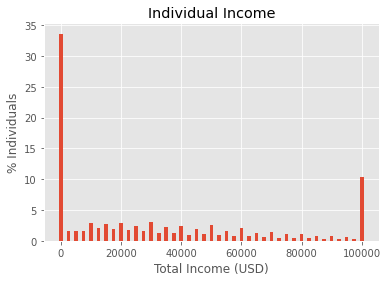

In [67]:
# PTOT_R
# TOTAL PERSON INCOME RECODE
data = pd.read_csv('asecpub23csv/pppub23.csv', nrows=100000)['PTOT_R'].apply(lambda x: ptot_key[x])

# Get the percentage of each unique value
percentages = data.value_counts(normalize=True) * 100

counts.sort_index(inplace=True)
plt.bar(percentages.index, percentages.values, width=1200)
plt.title('Individual Income')
plt.xlabel('Total Income (USD)')
plt.ylabel('% Individuals')

plt.savefig('individual_income.png')

plt.show()

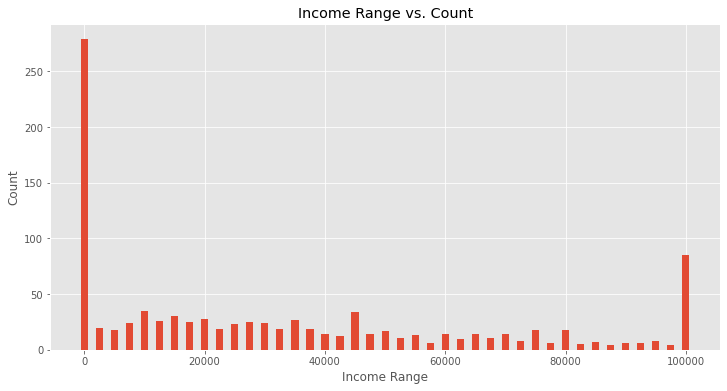

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data_dict = {
    0: 279, 100000: 85, 10000: 35, 45000: 34, 15000: 30, 20000: 28, 35000: 27, 
    12500: 26, 27500: 25, 17500: 25, 30000: 24, 7500: 24, 25000: 23, 2500: 20, 
    32500: 19, 37500: 19, 22500: 19, 75000: 18, 5000: 18, 80000: 18, 50000: 17, 
    47500: 14, 40000: 14, 70000: 14, 65000: 14, 60000: 14, 55000: 13, 42500: 12, 
    52500: 11, 67500: 11, 62500: 10, 95000: 8, 72500: 8, 85000: 7, 77500: 6, 
    57500: 6, 92500: 6, 90000: 6, 82500: 5, 97500: 4, 87500: 4
}

# Create a Pandas Series from the data
income_data = pd.Series(data_dict)

# Sorting the Series by index (income keys)
income_data.sort_index(inplace=True)

# Plotting the data
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(income_data.index, income_data.values, width=1200)

# Set the x and y labels
plt.xlabel('Income Range')
plt.ylabel('Count')

# Adding a title
plt.title('Income Range vs. Count')

# Show the plot
plt.show()
